In [1]:
from skimage import io as skio
from skimage.filters import threshold_mean
from skimage import morphology as skmo
from matplotlib import  pyplot as plt
import numpy as np

In [114]:
img = skio.imread('thumbnail.png', as_grey=True)
binary = img < threshold_mean(img)

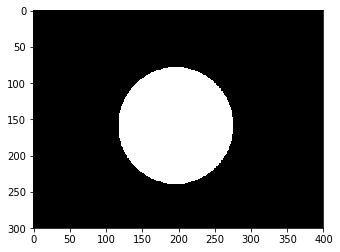

In [115]:
plt.imshow(binary, cmap=plt.cm.gray)

In [116]:
A = [np.array([[1, 1, 1], [0, 0, 1], [0, 0, 0]]), 
     np.array([[1, 1, 0], [1, 0, 0], [1, 0, 0]]),
     np.array([[0, 0, 0], [1, 0, 0], [1, 1, 1]]),
     np.array([[0, 0, 1], [0, 0, 1], [0, 1, 1]]),
     np.array([[1, 1, 1], [1, 0, 0], [0, 0, 0]]), 
     np.array([[1, 0, 0], [1, 0, 0], [1, 1, 0]]),
     np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1]]),
     np.array([[0, 1, 1], [0, 0, 1], [0, 0, 1]])]
B = [np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]), 
     np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]), 
     np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]), 
     np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]), 
     np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]), 
     np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]), 
     np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]), 
     np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])]

In [117]:
def iteration(img, A, B):
    for i in range(8):
        img = (img | (skmo.erosion(img, selem=A[i]) & ~skmo.dilation(img, selem=-B[i])))
    return img

In [128]:
for i in range(100):
    binary = iteration(binary, A, B)

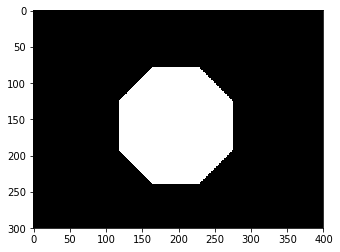

In [129]:
plt.imshow(binary, cmap=plt.cm.gray)